## Intro to Brownian Motion

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

Brownian motion is an important topic in statistics since it is regularly observed in biology, physics, chemistry and finance. The first observation of Brownian motion was in the seemingly erratic motion of pollen grains in water. The interaction of water molecules and their thermal energy is transferred via collision with pollen grains to create their trajectories.

In essence, the equations of Brownian Motion are described by **stochastic differential equations**:

$$dX_t = \mu dt + \sigma dW_t$$

where $X_t$ represents the brownian motion process, $\mu$ is the deterministic drift, $W_t$ is the Wiener process. Simply put, $W_t \sim N(0, t)$ 

To get a useful form of the SDE above, we can naively integrate both sides:

$$X_t = \mu t + \sigma W_t$$

Then, the distribution of $X_t \sim N(\mu t, \sigma^2 t)$ 

Let's try to simulate this for different points in time below to observe how the probability density evolves with time:

In [37]:
t = np.linspace(1, 10, 10)
x = np.linspace(-5, 20, 1000)
mu = 1
sigma = 1

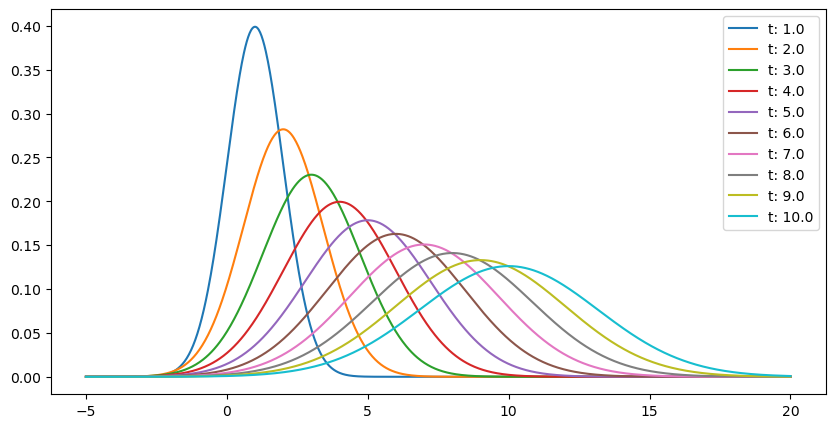

In [38]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 5)
for idx, i in enumerate(t):
    ax.plot(x, norm.pdf(x, mu * i, sigma * np.sqrt(i)), label='t: ' + str(i))
plt.legend()

As we see, the peak of the probability distribution drifts upwards due to the positive deterministic drift. Also, the distribution spreads outward due to increasing standard deviation because of the $W$ term.

<ins>Example 1: Probability of hitting $X_1$ at time t</ins>

Assume a driftless Brownian motion process, where $\mu = 0, \sigma = 1$, what is the probability that $X_{10} \geq 1.5$, assume $X_0 = 0$? 

We know that $X_{10} \sim N(0, 10)$, then $$P(X_{10} \geq 1.5) = P(N(0, 10) \geq 1.5) = P(\sqrt{10} Z \geq 1.5) = P \left( Z \geq \frac{1.5}{\sqrt{10}}\right) = 1 - \Phi\left(\frac{1.5}{\sqrt{10}}\right)$$

<ins>Example 2: 11.4.3 Problem 1 (Introduction to Probability, Statistics, and Random Processes by Hossein Pishro-Nik)</ins>

Let $W(t)$ be a Brownian motion, find the $P(W_1 + W_2 > 2)$.

Let's attempt this problem slightly differently from what is shown in the solution. 

Rewrite using independent increment property of Brownian Motion, we can rewrite it as 2 separate, independent normal random variable, which we know can be added:
$$P(W_1 + W_2 > 2) = P(W_1 +(W_2 - W_1) + W_1 > 2) = P(2W_1 + (W_2 - W_1) > 2) = P(N(0, 2^2) + N(0, 1) > 2)$$
$$P(N(0, 5) > 2) = 1 - \Phi\left(\frac{2}{\sqrt{5}}\right)$$